Introduction:

Metro plays an important role in modern transportation, efficienly moving millions of commuters daily. Ensuring the safety and reliability of these metro system is utmost important. An unexpected anomalies and failure can cause inconvenience to the passengers, moreover it can pose significant economic and safety risk.

The MetroPT3 dataset at our disposal contains columns representing various operational features such as TP2, TP3, H1, DV_Pressure, Reservoirs, Oil_Temperature, Motor_Current, COMP, DV_electric, Towers, MPG, LPS, Pressure, Oil_level, and cadual_impulses. These columns represents several data points that are continuously collected by different sensors and monitoring systems deployed in the metro.


Objective:

The primary objective of this research project is to harness the potential of machine learning algorithms developed to detect the anomalies to identify the deviations from normal patterns within the metro system.
 
Anomalies includes sudden spike or drop in pressure, irregular temperature patterns, unexpected motor current fluctuations etc. Detecting such anomalies is very crucial to ensure reliability and safety of the metro system.

Terminologies:

Analog Sensors : As for the analog sensors, we have pressure, temperature and electric current consumed at different components of the APU, as detailed below.

1. TP2 : Pressure on compressor (bar).

2. TP3 : Pressure generated at pneumatic panel (bar).

3. H1 : Valve that is activated when the pressure read by the pressure switch of the command is above the      operating pressure of 10.2 bar.

4. DV_Pressure : Pressure exerted due to pressure drop generated when air dryers towers discharge the water. When it is equal to zero, the compressor is working under load (bar).

5. Reservoirs : Pressure inside the air tanks installed on the trains (bar).

6. Oil_temperature : Temperature of oil present on the compressor (°C).

7. Motor_current : Motor’s current, which should present the following values: 
(i) close to 0 A when the compressor turns off; 
(ii) close to 4 A when the compressor is working offloaded; and 
(iii) close to 7 A when the compressor is operating under load (A);

Digital Sensors : The eight digital signals are collected directly from the APU and GPS information.

The digital sensors installed in the APU assume only two different values: zero when inactive or one when a specific event activates them. The considered digital sensors are the following.

8. COMP : Electrical signal of the air intake valve on the compressor. It is active when there is no admission of air on the compressor, meaning that the compressor turns off or working offloaded.

9. DV_electric : Electrical signal that commands the compressor outlet valve. When it is active, it means that the compressor is working under load; when it is not active, it means that the compressor is off or offloaded.s

10. TOWERS : Signal that defines which tower is drying the air and which tower is draining the humidity removed from the air. When it is not active, it means that tower one is working; when it is active, it means that tower two is working.

11. MPG : Is responsible for activating the intake valve to start the compressor under load when the pressure in the APU is below 8.2 bar. Consequently, it will activate the sensor COMP, which assumes the same behaviour as the MPG sensor.

12. LPS : Signal activated when the pressure is lower than 7 bars.

13. Pressure_switch : Signal activated when pressure is detected on the pilot control valve.

14. Oil_Level : The oil level on the compressor is active (equal to one) when the oil is below the expected values.

15. Caudal_impulses : Signal produced by the flowmeter indicating the existence of the flow of air per second.

In [46]:
import os
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

In [47]:
df=pd.read_csv('C:/Users/mahar/OneDrive/Desktop/Dataset/MetroPT3(AirCompressor).csv')
display(df)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df_new=df[0:50000]

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516943,15169430,2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516944,15169440,2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516945,15169450,2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516946,15169460,2020-09-01 03:59:40,-0.012,8.876,8.864,-0.022,8.878,59.550,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [48]:
df.isnull().sum()

Unnamed: 0         0
timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64

In [49]:
df.describe()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1.516948e+06,1516948,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06
mean,7.584735e+06,2020-05-16 22:58:36.631517184,1.367826e+00,8.984611e+00,7.568155e+00,5.595619e-02,8.985233e+00,6.264418e+01,2.050171e+00,8.369568e-01,1.606106e-01,9.198483e-01,8.326640e-01,3.420025e-03,9.914368e-01,9.041556e-01,9.371066e-01
min,0.000000e+00,2020-02-01 00:00:00,-3.200000e-02,7.300000e-01,-3.600000e-02,-3.200000e-02,7.120000e-01,1.540000e+01,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.792368e+06,2020-03-23 05:05:04.500000,-1.400000e-02,8.492000e+00,8.254000e+00,-2.200000e-02,8.494000e+00,5.777500e+01,4.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,7.584735e+06,2020-05-17 08:07:06,-1.200000e-02,8.960000e+00,8.784000e+00,-2.000000e-02,8.960000e+00,6.270000e+01,4.500000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.137710e+07,2020-07-10 03:07:27.500000,-1.000000e-02,9.492000e+00,9.374000e+00,-1.800000e-02,9.492000e+00,6.725000e+01,3.807500e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.516947e+07,2020-09-01 03:59:50,1.067600e+01,1.030200e+01,1.028800e+01,9.844000e+00,1.030000e+01,8.905000e+01,9.295000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
std,4.379053e+06,NaN,3.250930e+00,6.390951e-01,3.333200e+00,3.824015e-01,6.383070e-01,6.516261e+00,2.302053e+00,3.694052e-01,3.671716e-01,2.715280e-01,3.732757e-01,5.838091e-02,9.214078e-02,2.943779e-01,2.427712e-01


In [50]:
Columns=[ 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
 'Oil_temperature','Motor_current', 'COMP', 'DV_eletric', 'Towers',
 'MPG', 'LPS',  'Pressure_switch', 'Oil_level', 'Caudal_impulses']

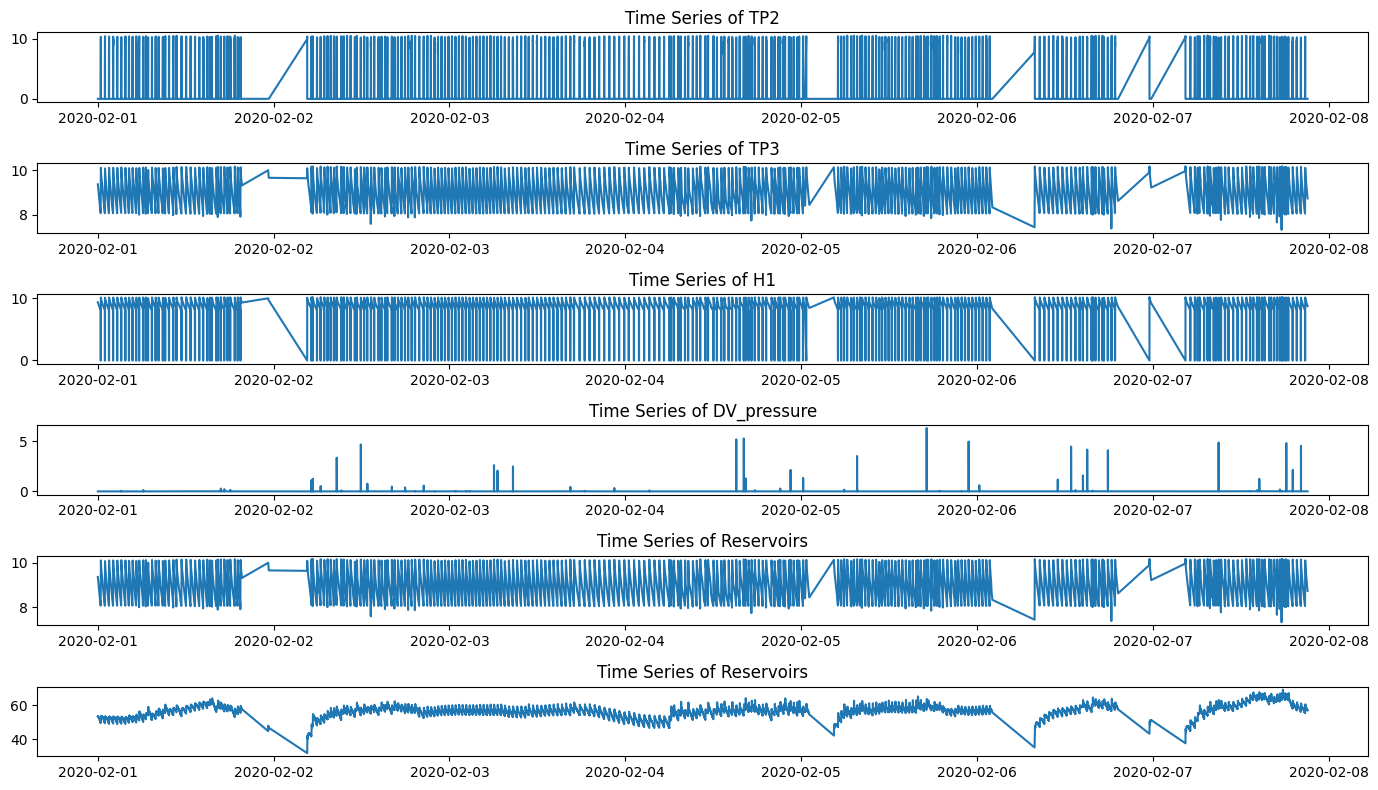

In [53]:
plt.figure(figsize=(14, 8))

plt.subplot(6, 1, 1)
plt.plot(df_new['timestamp'], df_new['TP2'])
plt.title('Time Series of TP2')

plt.subplot(6, 1, 2)
plt.plot(df_new['timestamp'], df_new['TP3'])
plt.title('Time Series of TP3')

plt.subplot(6, 1, 3)
plt.plot(df_new['timestamp'], df_new['H1'])
plt.title('Time Series of H1')

plt.subplot(6, 1, 4)
plt.plot(df_new['timestamp'], df_new['DV_pressure'])
plt.title('Time Series of DV_pressure')

plt.subplot(6, 1, 5)
plt.plot(df_new['timestamp'], df_new['Reservoirs'])
plt.title('Time Series of Reservoirs')

plt.subplot(6, 1, 6)
plt.plot(df_new['timestamp'], df_new['Oil_temperature'])
plt.title('Time Series of Reservoirs')

plt.tight_layout()
plt.show()

<Axes: >

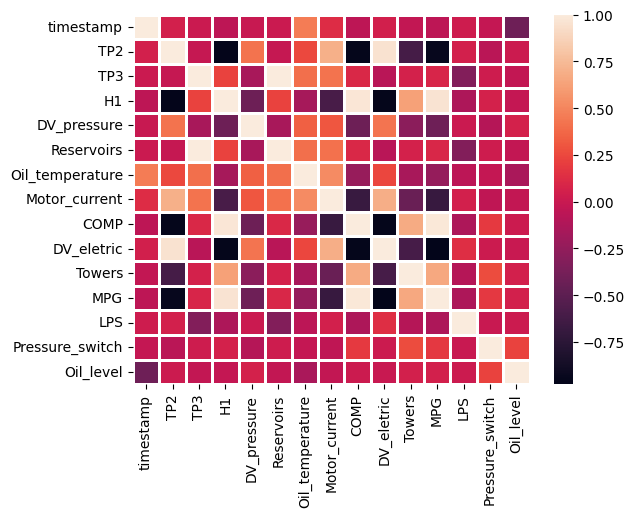

In [52]:
df_Without_Unnamed = df[["timestamp", "TP2", "TP3", "H1", "DV_pressure",
       "Reservoirs", "Oil_temperature", "Motor_current", "COMP", "DV_eletric",
       "Towers", "MPG", "LPS", "Pressure_switch", "Oil_level"]]
sns.heatmap(data=df_Without_Unnamed.corr(), lw = 1)

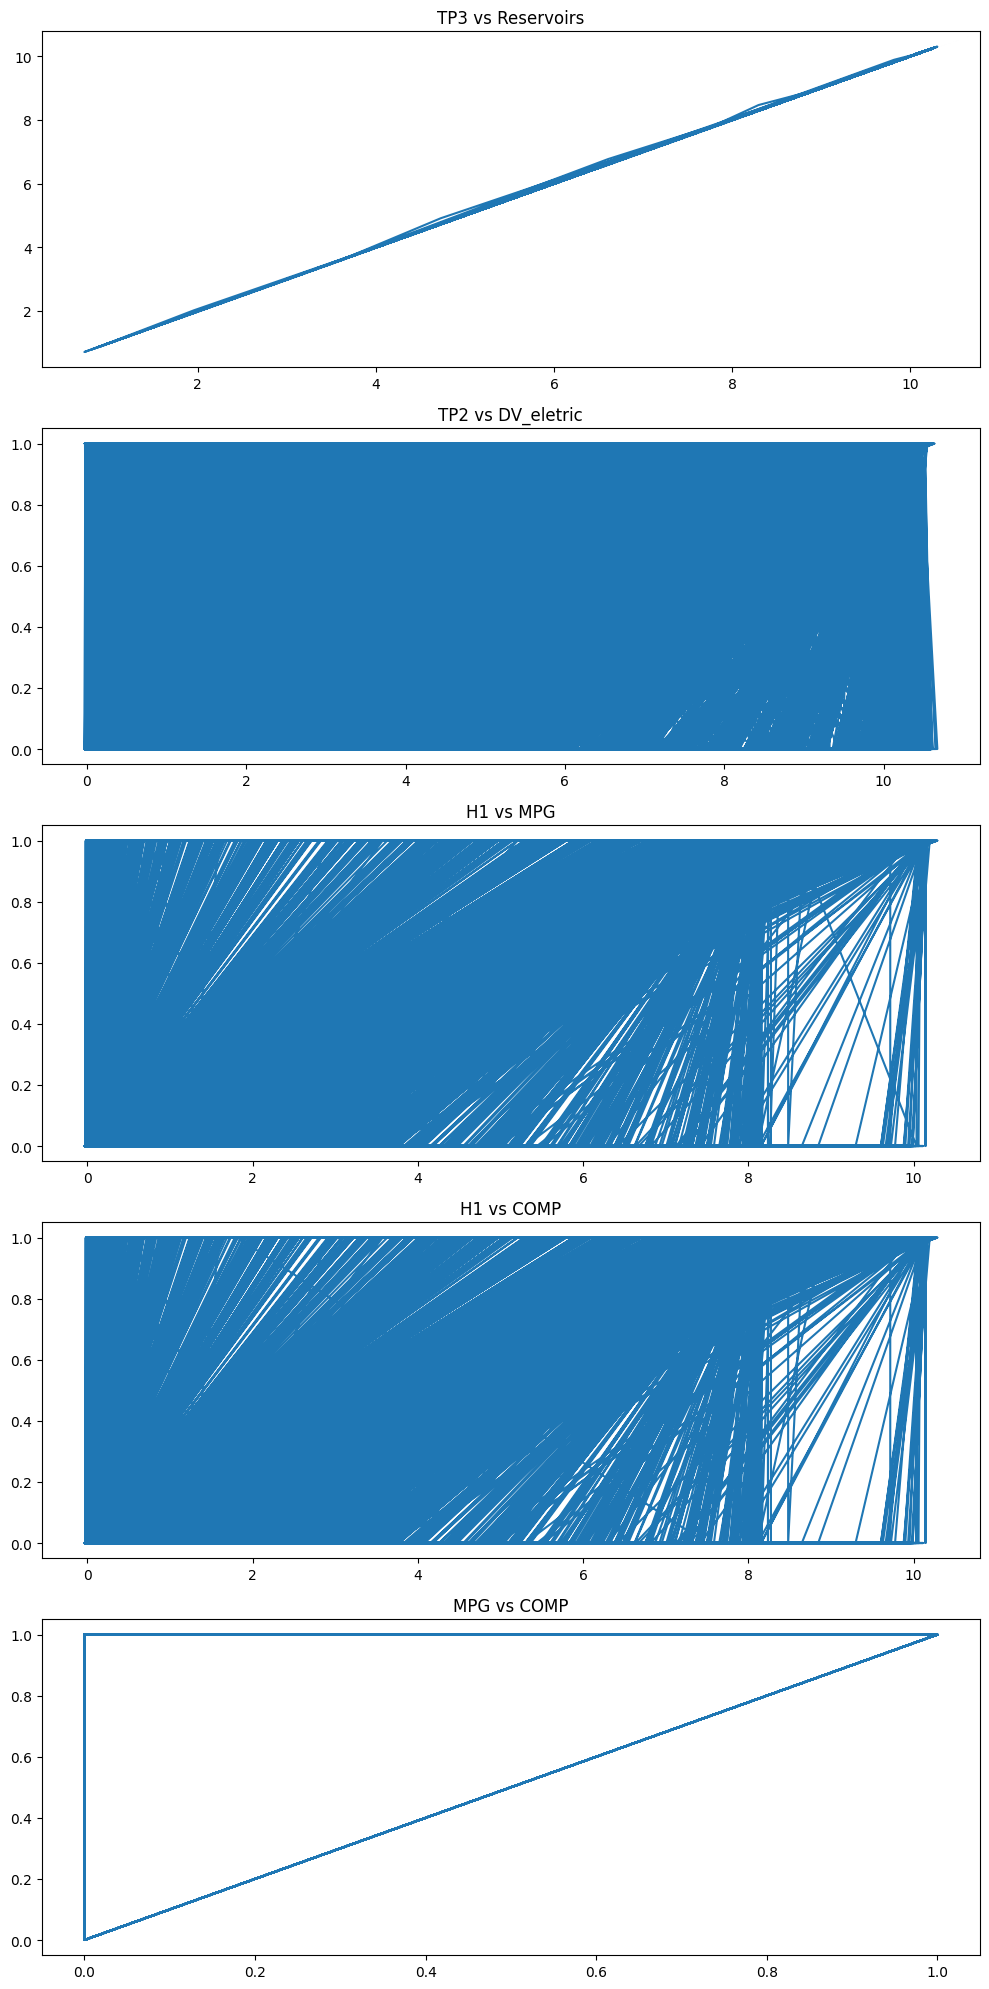

In [59]:
plt.figure(figsize=(10, 20))

plt.subplot(5, 1, 1)
plt.plot(df['TP3'], df['Reservoirs'])
plt.title('TP3 vs Reservoirs')

plt.subplot(5, 1, 2)
plt.plot(df['TP2'], df['DV_eletric'])
plt.title('TP2 vs DV_eletric')

plt.subplot(5, 1, 3)
plt.plot(df['H1'], df['MPG'])
plt.title('H1 vs MPG')

plt.subplot(5, 1, 4)
plt.plot(df['H1'], df['COMP'])
plt.title('H1 vs COMP')

plt.subplot(5, 1, 5)
plt.plot(df['MPG'], df['COMP'])
plt.title('MPG vs COMP')



plt.tight_layout()
plt.show()